In [1]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

plt.rcParams.update({'font.size': 15})

In [35]:
path = 'C:/Users/aganb/Desktop/Thesis/code/v1.0/logs/model_validation'
all_files = glob.glob(path + "/*.csv")
df_from_each_file = (pd.read_csv(f) for f in all_files)
data = pd.concat(df_from_each_file, ignore_index=True)
data = pd.read_csv('C:/Users/aganb/Desktop/Thesis/code/v1.0/logs/model_validation/const_mass.csv')
data.shape

In [147]:
def plot(df, cond_col, cond_val, var1, var2):
    data = df[df[cond_col] == cond_val]
    fig = plt.figure(figsize=(15, 10))
    plt.title(cond_col + ": " + str(cond_val) + ". " + var1 + " vs " + var2)
    prev_mark = 0
    for horizon in data['horizon'].unique():
        data_horizon = data[data['horizon'] == horizon]
        cm = [i % (horizon or 1) for i in range(data_horizon.shape[0])]
        plt.scatter(np.arange(data_horizon.shape[0]) + prev_mark, data_horizon[var1], c=cm, 
                    alpha=1)
        plt.plot(np.arange(data_horizon.shape[0]) + prev_mark, data_horizon[var2], c='cyan', 
                    alpha=0.5, linewidth=4)
        prev_mark += data_horizon.shape[0] + 1

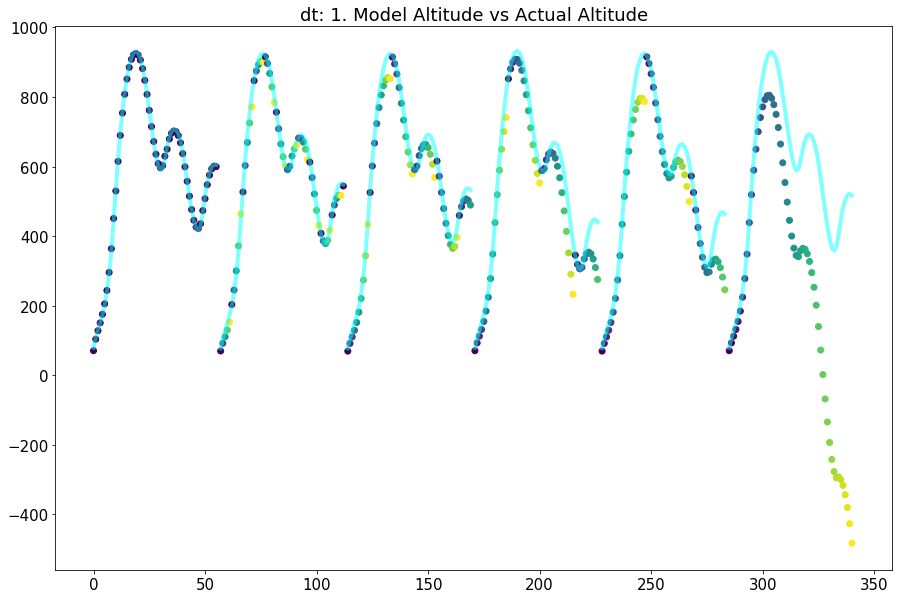

In [150]:
plot(data, 'dt', 1, 'Model Altitude', 'Actual Altitude')

In [6]:
data

,horizon,dt,Input Altitude,Input Velocity,Model Altitude,Model Velocity,Model Thrust,Model Drag,Model Mass,Model Weight,Model Acceleration,Actual Altitude,Actual Velocity,Actual Thrust,Actual Drag,Actual Mass
0,0.0,0.1,42.555390,39.208282,46.377527,38.221368,0.000000,416.124193,6873.687012,67421.305008,-9.869147,46.560976,40.022654,0.000000,-471.417742,6868.950684
1,0.0,0.1,46.560976,40.022654,50.467551,39.065743,2078.301136,432.943207,6873.687012,67420.404874,-9.569107,50.504679,39.052568,2078.424805,-448.969280,6868.918457
2,0.0,0.1,50.504679,39.052568,54.317299,38.126203,4157.004735,412.948467,6873.687012,67419.518665,-9.263655,54.353211,38.113065,4157.238770,-427.763530,6868.807129
3,0.0,0.1,54.353211,38.113065,58.074934,37.217234,6236.094697,394.061567,6873.687012,67418.653859,-8.958310,58.109617,37.204174,6236.441406,-407.743348,6868.615234
4,0.0,0.1,58.109617,37.204174,61.743503,36.338867,8315.558712,376.237200,6873.687012,67417.809771,-8.653069,62.500048,36.153834,8316.159180,-385.226460,6868.280762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6043,1000.0,1.0,-299.345772,-7.308072,-316.467617,-17.121845,0.000000,41.408516,6875.266113,67513.709807,-9.813773,480.084328,28.625356,0.000000,-265.290829,5686.869141
6044,1000.0,1.0,-316.467617,-17.121845,-343.393894,-26.926277,0.000000,109.485009,6875.266113,67517.565093,-9.804432,504.219643,18.655880,0.000000,-122.556458,5686.869141
6045,1000.0,1.0,-343.393894,-26.926277,-380.108147,-36.714253,0.000000,228.689889,6875.266113,67523.628688,-9.787976,518.023996,8.902664,0.000000,-35.201730,5686.869141
6046,1000.0,1.0,-380.108147,-36.714253,-426.586846,-46.478699,0.000000,398.734745,6875.266113,67531.897778,-9.764446,522.064401,-0.254840,0.000000,0.356912,5686.869141


## Altitude R2 scores

In [7]:
df_r2 = pd.DataFrame(columns=data['dt'].unique(), index=data['horizon'].unique())

In [8]:
for dt in data['dt'].unique():
    for horizon in data['horizon'].unique():
        filtered_df = data[(data['horizon'] == horizon) & (data['dt'] == dt)]
        df_r2[dt][horizon] = r2_score(filtered_df['Actual Altitude'], filtered_df['Model Altitude'])

In [9]:
df_r2

,0.1,0.2,0.5,1.0
0.0,0.999994,0.99999,0.999967,0.999492
5.0,0.999937,0.999948,0.999594,0.995186
10.0,0.999697,0.999696,0.998364,0.9823
15.0,0.999639,0.999259,0.993117,0.932878
20.0,0.999617,0.998591,0.992901,0.914799
1000.0,-0.908384,-1.74185,-1.76161,-2.29172


# Varying mass

In [10]:
data2 = pd.read_csv('C:/Users/aganb/Desktop/Thesis/code/v1.0/logs/model_validation/varying_mass.csv')
data2.shape

(6480, 16)

In [11]:
data2.columns

Index(['horizon', 'dt', 'Input Altitude', 'Input Velocity', 'Model Altitude',
       'Model Velocity', 'Model Thrust', 'Model Drag', 'Model Mass',
       'Model Weight', 'Model Acceleration', 'Actual Altitude',
       'Actual Velocity', 'Actual Thrust', 'Actual Drag', 'Actual Mass'],
      dtype='object')

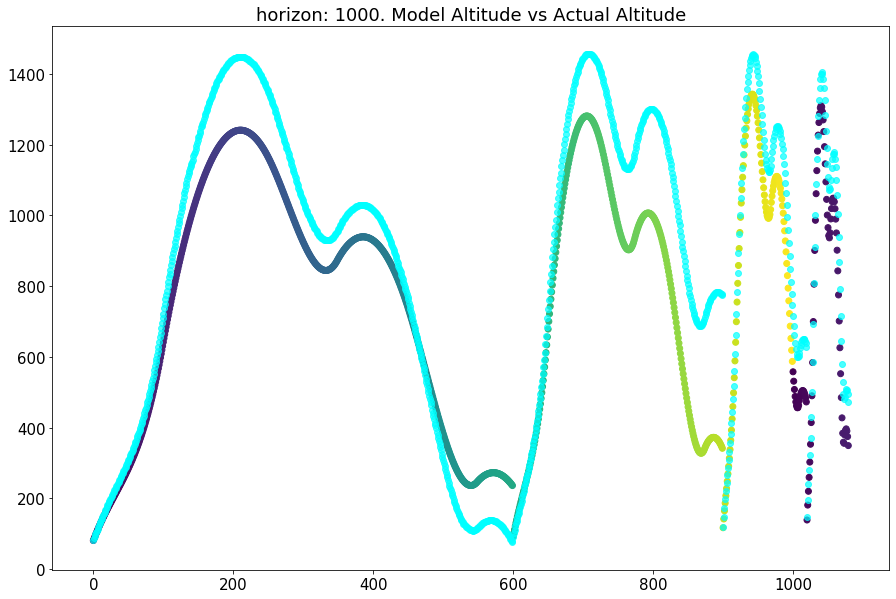

In [22]:
plot(data2, 'horizon', 1000, 'Model Altitude', 'Actual Altitude')

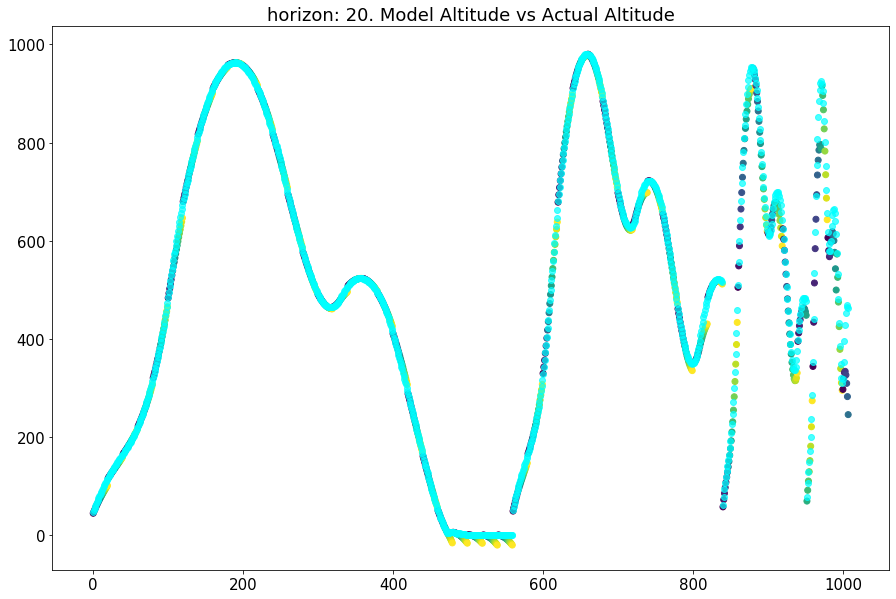

In [13]:
plot(data, 'horizon', 20, 'Model Altitude', 'Actual Altitude')